### Difference between ALP & Zero spectral fits (10 seconds)

This notebook shows LLR between two models (ALP and zero) when averaging the ALP signal for 10 seconds.

In [1]:
# import xspec as xs
# xs.Xset.allowPrompting = False #keeps pyxspec from hanging, waiting a response to a prompt
# xs.Xset.allowNewAttributes = True

# importing general packages

import numpy as np
import os, sys
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

plt.rc('font', family='serif', size=20)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5

%matplotlib inline

In [2]:
# defining a median of a histogram

def med(counts, bins):
    a=np.zeros(len(counts))
    for i in range(len(counts)):
        if np.sum((bins[1]-bins[0])*counts[:i])>0.5:
            a[i]=i
        else:
            a[i]=len(counts)+1
    return bins[int(a.min())]

/Users/milena/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


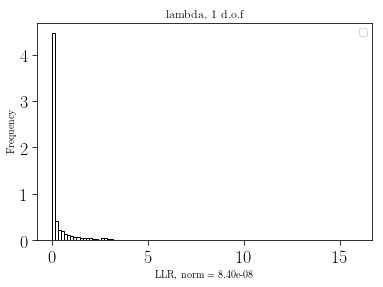

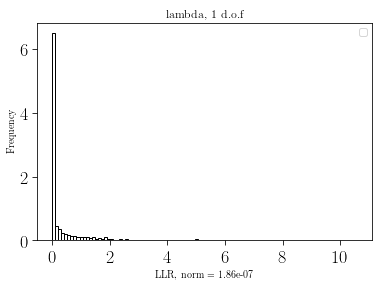

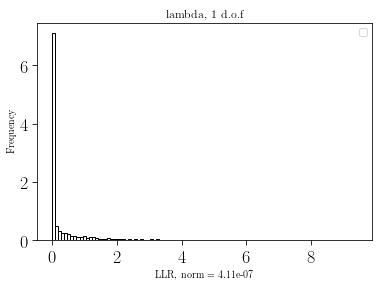

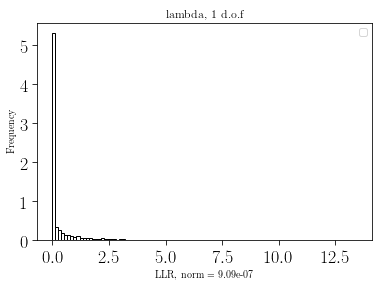

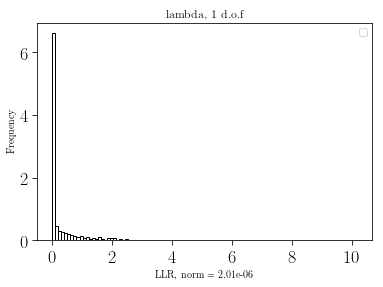

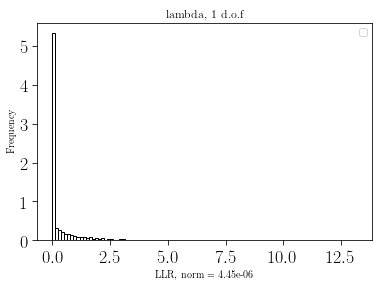

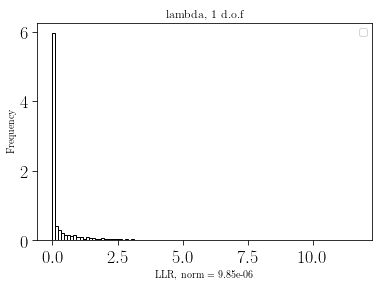

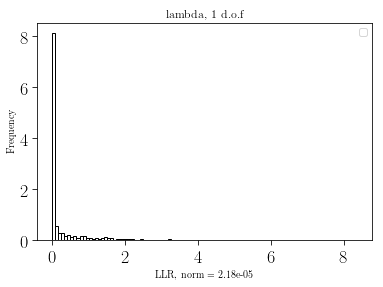

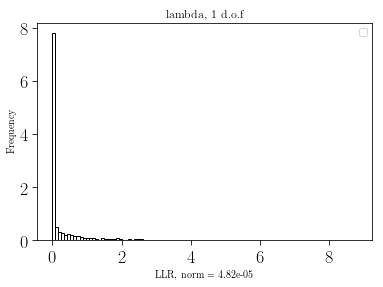

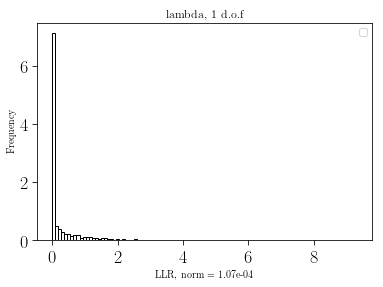

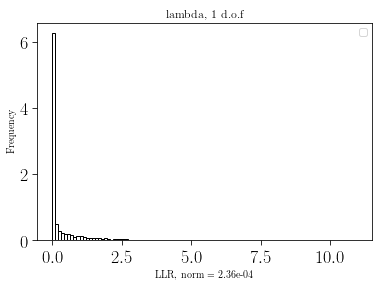

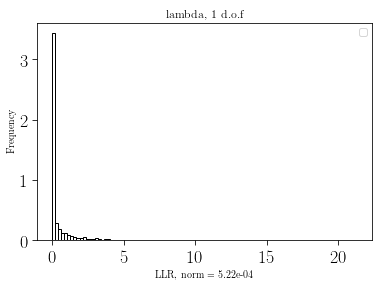

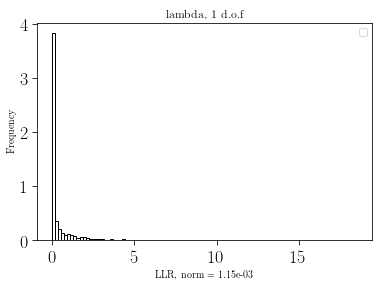

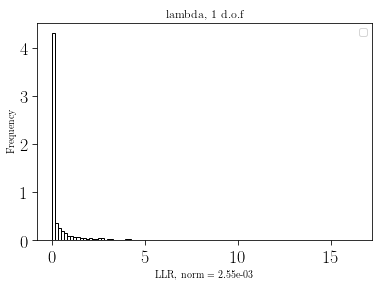

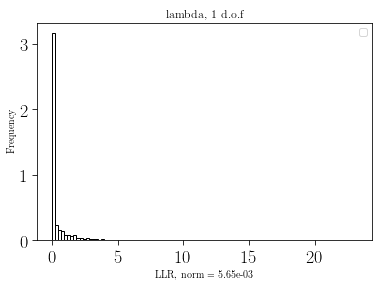

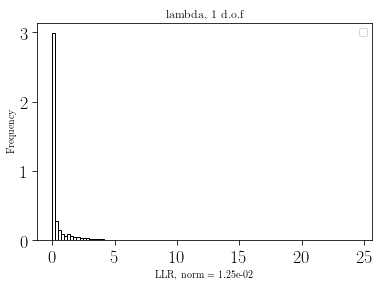

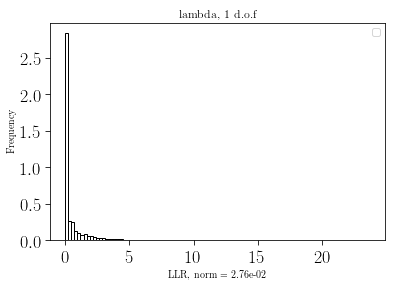

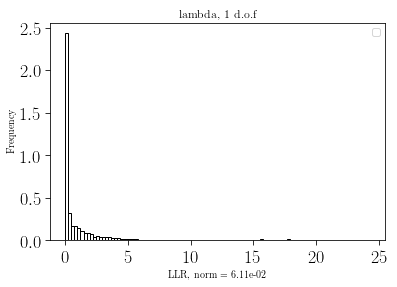

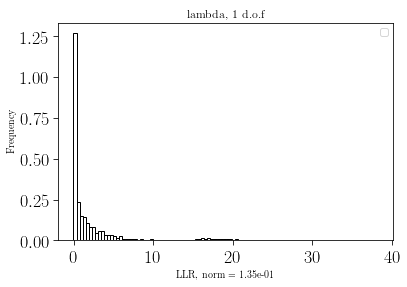

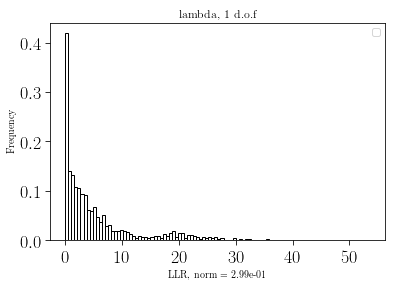

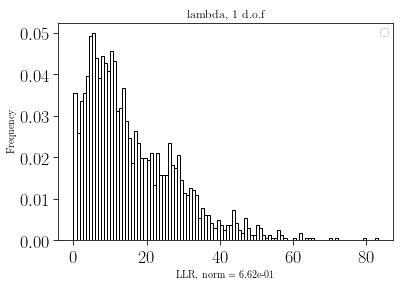

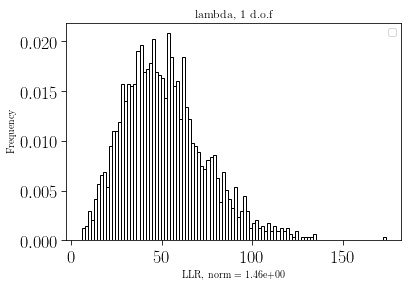

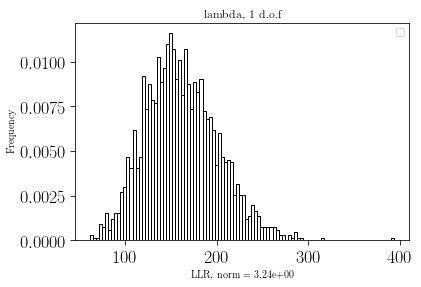

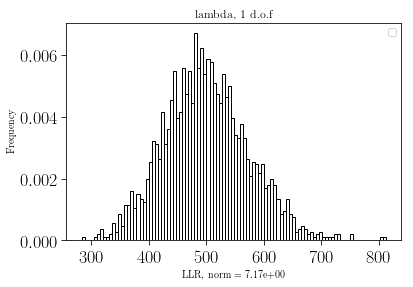

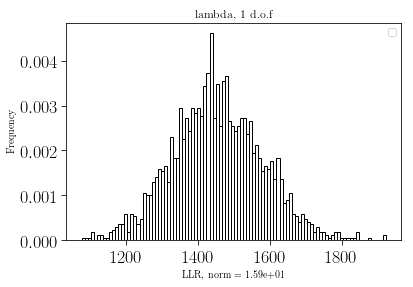

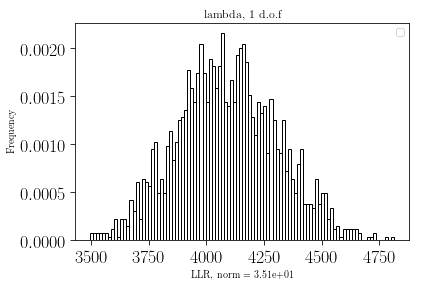

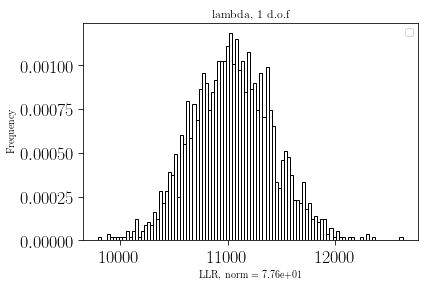

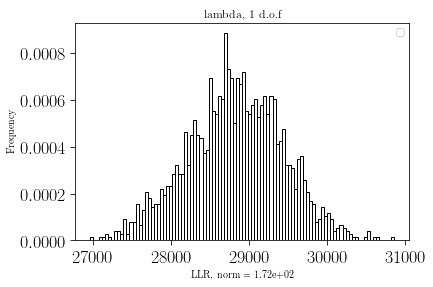

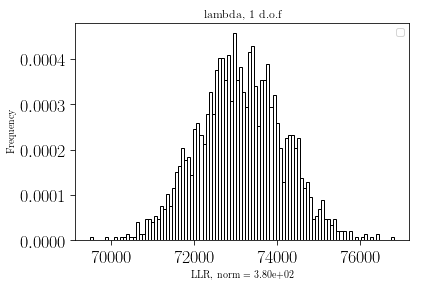

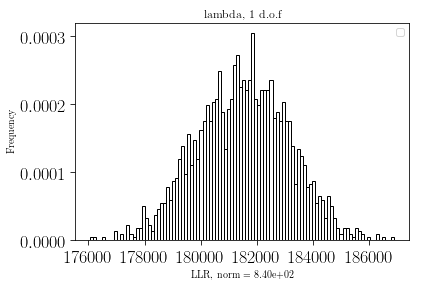

In [3]:
# reported PGstat = - 2 log (L0)
# LLR = - 2log(L0/Lalp) = -2log(L0) + 2log(Lalp) = PGstat(L0) - PGstat(Lalp)

counts = np.zeros((30,100))
bins = np.zeros((30,101))
medians = np.zeros(30)

N = np.logspace(np.log10(8.4e-8), np.log10(8.4e2), 30)

zero_fit = np.load('pgfit_ZERO.npy')
ALP_fit = np.load('pgfit_ALP.npy')
diff = np.zeros((30, 2000))

for i in range(30):
    diff[i,:] = -((ALP_fit[i,1:])-(zero_fit[i,1:])) 
    counts[i,:], bins[i,:], _ = plt.hist(diff[i,:], bins=100, fill=None, normed= True)
    medians[i] = med(counts[i,:], bins[i,:])
    plt.ylabel('Frequency')
    plt.xlabel('LLR, norm = %.2e' %N[i])
    plt.title('lambda, 1 d.o.f')
    plt.legend()
    #plt.savefig('lambda%s.pdf' %i)
    plt.show()

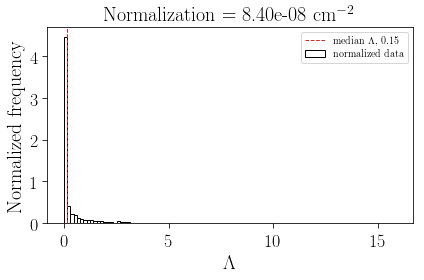

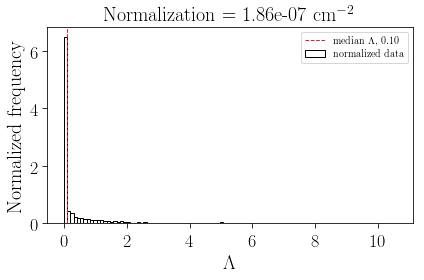

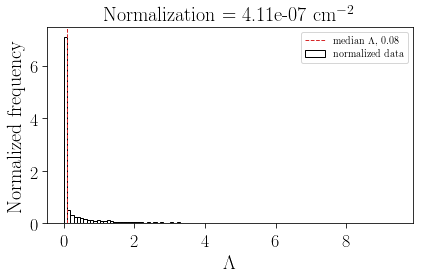

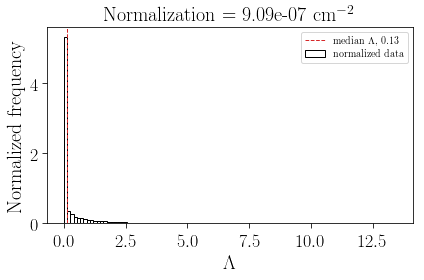

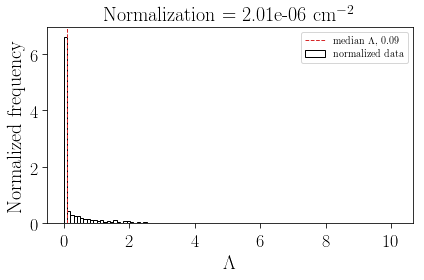

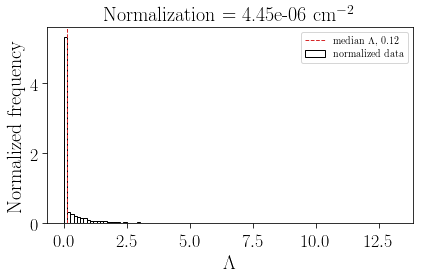

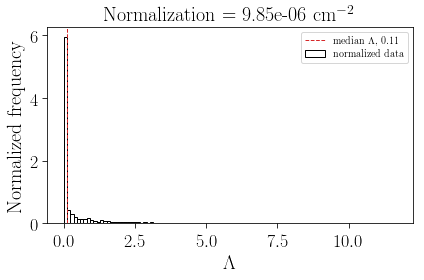

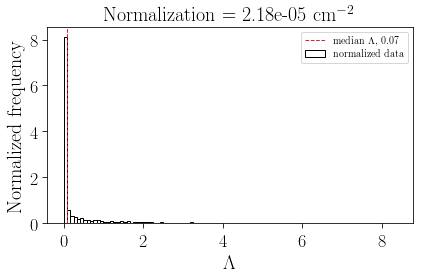

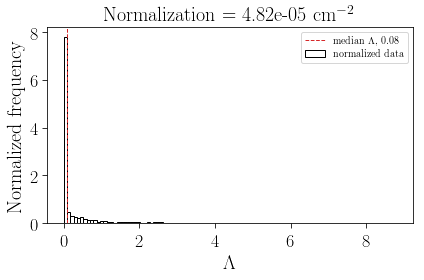

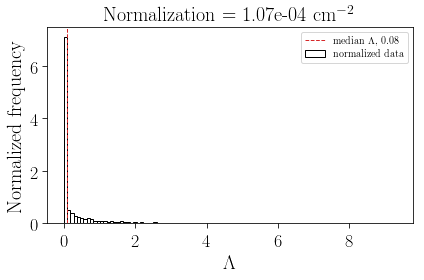

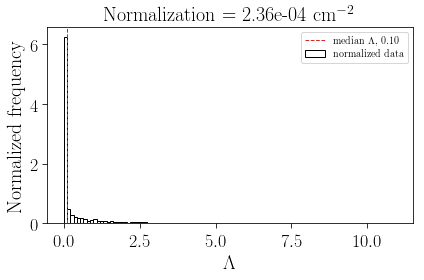

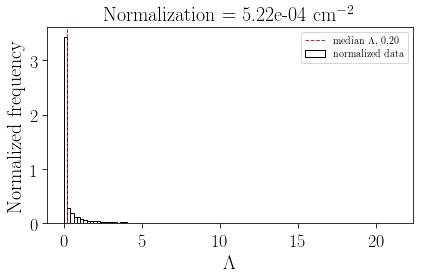

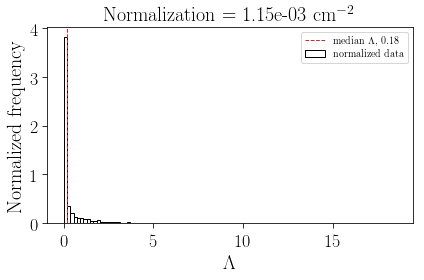

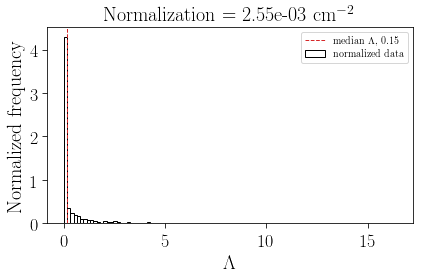

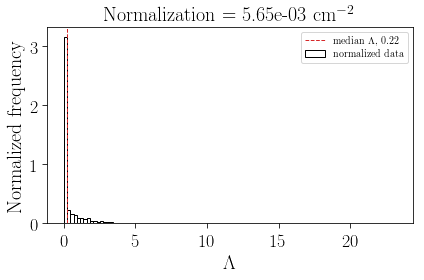

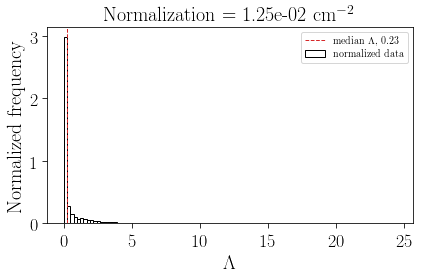

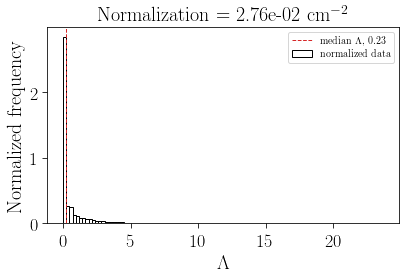

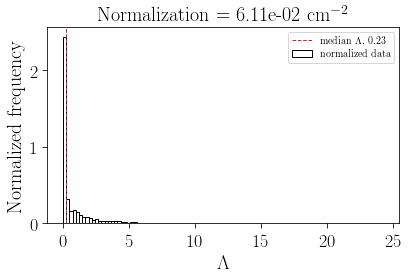

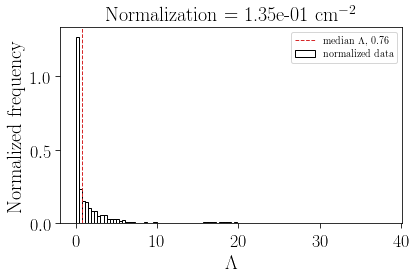

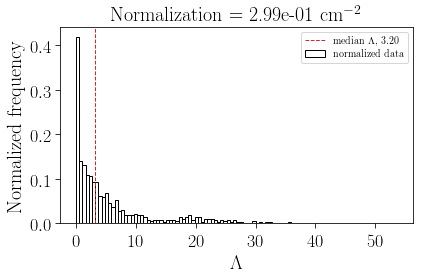

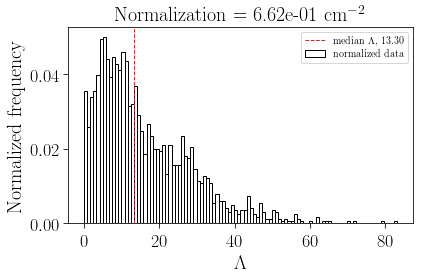

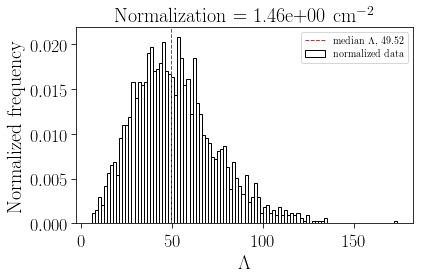

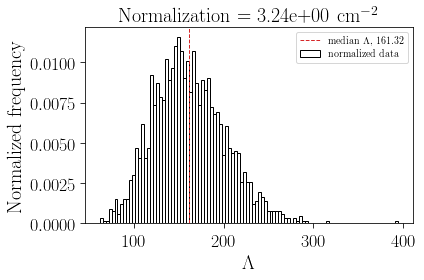

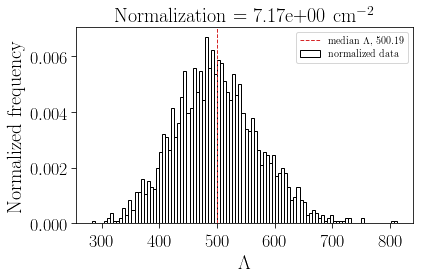

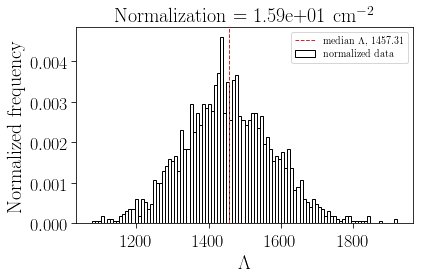

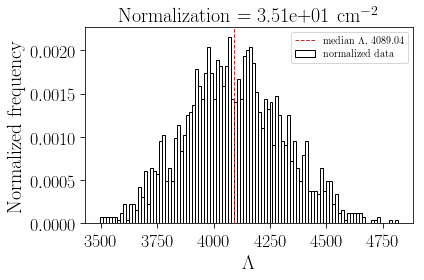

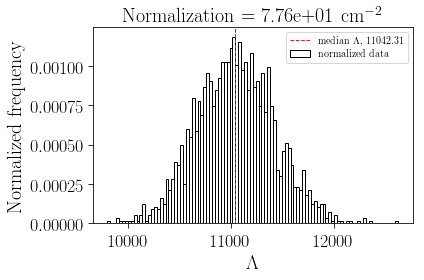

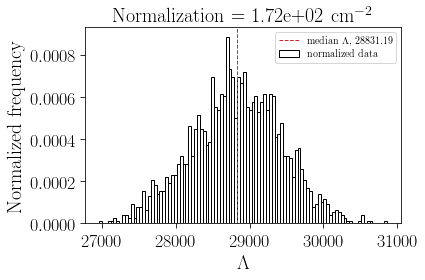

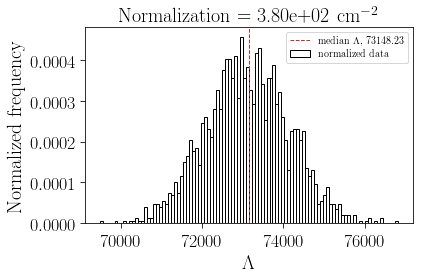

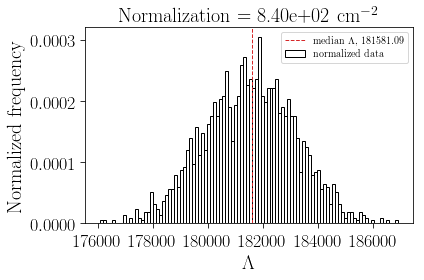

In [4]:
for i in range(0,30):
    plt.hist(diff[i,:], bins=100, fill=None, normed = True, label=r'normalized data')
    plt.axvline(medians[i], color='C3', ls ='--',lw=1, label = 'median $\Lambda$, %.2f' %medians[i])
    plt.title('Normalization = %.2e cm$^{-2}$' %N[i], fontsize=20)
    plt.ylabel('Normalized frequency', fontsize=20)
    plt.xlabel('$\Lambda$', fontsize=20)
    plt.legend(fontsize=20)
    plt.legend()
    plt.tight_layout()
    #plt.savefig('lambda%s.pdf' %i)
    
    plt.show()


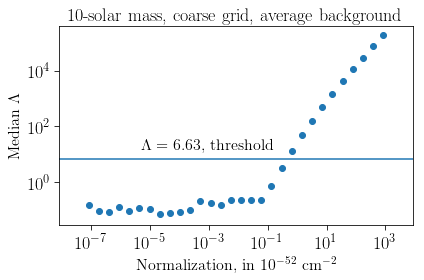

In [5]:
plt.scatter(N, medians)
#plt.legend(loc='upper left', fontsize=12)
plt.xlim(N[0]/10., N[29]*10)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Normalization, in 10$^{-52}$ cm$^{-2}$', fontsize = 16)
plt.ylabel('Median $\Lambda$', fontsize = 16)
plt.axhline(6.63)
plt.title('10-solar mass, coarse grid, average background', fontsize=18)
plt.text(5e-6, 1.5e1, '$\Lambda=6.63$, threshold', fontsize = 16)
plt.tight_layout()
#plt.savefig('median_vs_norm_coarse_revised.pdf')